In [1]:
import pandas as pd

df = pd.read_csv("Advertising.csv")
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().sum()
# No missing values found

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [3]:
df.drop_duplicates(inplace=True)


In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [7]:
X = df.drop('Sales', axis=1)  # Features
y = df['Sales']               # Target


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 3.1990044685889005
R2 Score: 0.8986489151417081


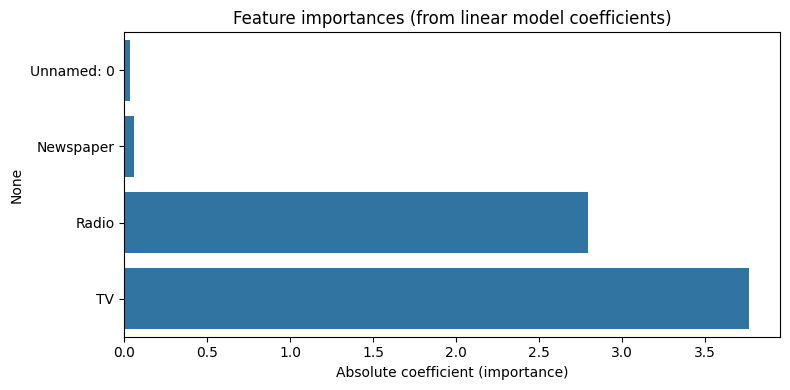

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# LinearRegression doesn't have feature_importances_; use coefficients instead
importance = model.coef_
if hasattr(importance, "ndim") and importance.ndim > 1:
	importance = importance.ravel()

# Use absolute coefficients to show importance magnitude and align with columns
feat_imp = pd.Series(importance, index=X.columns).abs().sort_values(ascending=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.xlabel("Absolute coefficient (importance)")
plt.title("Feature importances (from linear model coefficients)")
plt.tight_layout()
plt.show()


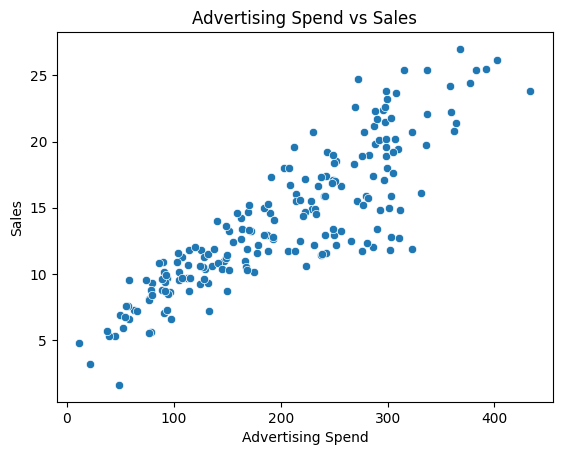

In [15]:
# create Advertising Spend if it doesn't exist (sum of TV, Radio, Newspaper)
if 'Advertising Spend' not in df.columns:
	df['Advertising Spend'] = df[['TV', 'Radio', 'Newspaper']].sum(axis=1)

sns.scatterplot(x='Advertising Spend', y='Sales', data=df)
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.title('Advertising Spend vs Sales')
plt.show()


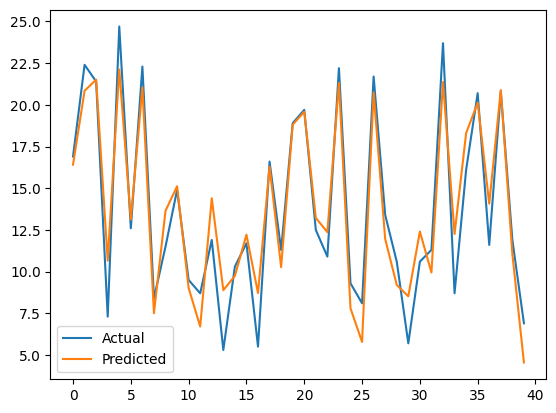

In [16]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
